In [1]:
import numpy as np
import dxchange
import holotomo
import matplotlib.pyplot as plt
import cupy as cp
import scipy.ndimage as ndimage
import numpy as np
import sys
import tomoalign

import dxchange
import numpy as np
import dxchange
from scipy.ndimage import rotate
import sys
import matplotlib.pyplot as plt
import concurrent.futures as cf
import threading
from functools import partial

%matplotlib inline


# Init data sizes and parametes of the PXM of ID16A

In [2]:
ntheta = 1500
n = 1536
ne = 2528
nz = 1280
ndist = 4
ngpus = 2
pnz = 32
same_prb = True
voxelsize=1e-8
offset = 8

In [3]:

def rotate_thread(data,ang,order,ids):
    # print(ids)
    data[ids] = rotate(data[ids], ang, reshape=False, order=order)
    
def rotate_batch(data,ang,order):
    print('rotate',ang)
    with cf.ThreadPoolExecutor() as e:
        # update flow in place
        e.map(partial(rotate_thread, data,
                       ang,order), range(0, data.shape[0]))       
    return data


In [4]:
recadmm = dxchange.read_tiff_stack(f'/data/vnikitin/holo/3d_ald/rfinal_probe_True_1536_1500_4/iters2_lowdens/data/of_recon/recon/iter16_00000.tiff',ind=np.arange(0,1280))#.copy()

88888888888888
None
88888888888888


In [5]:
from matplotlib_scalebar.scalebar import ScaleBar
voxelsize=1e-8
offset = 8
rec = dxchange.read_tiff(f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{ntheta}_{ndist}/cgfinal/r_{400:04}.tiff').copy()
print(rec.shape)
# dxchange.write_tiff_stack(rec,f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{ntheta}_{ndist}/cgfinal/r_{400:04}/r',overwrite=True)
recnoprobe = dxchange.read_tiff(f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{ntheta}_{ndist}/cgfinalnoprobe/r_{400:04}.tiff').copy()
# dxchange.write_tiff_stack(recnoprobe,f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{ntheta}_{ndist}/cgfinalnoprobe/r_{400:04}/r',overwrite=True)

# fig, ax = plt.subplots(1, figsize=(3, 3))
# plt.imshow(-rec[:,n//2-offset,:],cmap='gray')
# ax.add_artist(ScaleBar(voxelsize,location='lower right'))
# plt.colorbar()
# plt.savefig(f'figs/tmp1.png',dpi=300,bbox_inches='tight')

# fig, ax = plt.subplots(1, figsize=(3, 3))
# plt.imshow(-rec[n//2,:],cmap='gray')
# ax.add_artist(ScaleBar(voxelsize,location='lower right'))
# plt.colorbar()
# plt.savefig(f'figs/tmp2.png',dpi=300,bbox_inches='tight')

(1280, 1536, 1536)


In [6]:

rec1 = recadmm.copy()
rec1 = rec1.swapaxes(0,1)
rec1 = rotate_batch(rec1, 39, 2)

rotate 39


In [7]:
rec2=rec1.copy()
rec2 = rec2.swapaxes(0,2)
rec2 = rotate_batch(rec2, 35.7, 2)

rotate 35.7


In [8]:
rec3=rec2.copy()
rec3 = rec3.swapaxes(0,1)
rec3 = rotate_batch(rec3, 10.5,2)

rotate 10.5


In [9]:
rec4=rec3.copy()
rec4 = rec4.swapaxes(0,2)
rec4 = rotate_batch(rec4, -4.4+21.6, 2)

rotate 17.200000000000003


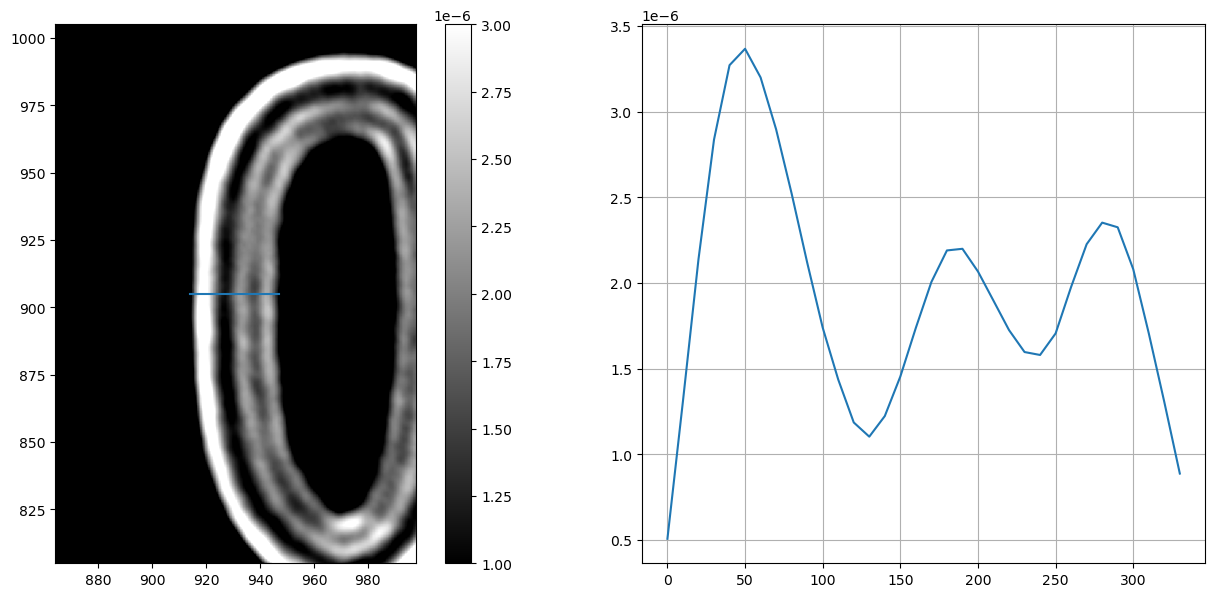

TypeError: 'Axes' object is not subscriptable

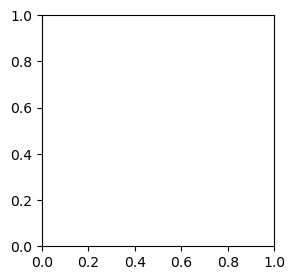

In [10]:
dxchange.write_tiff_stack(-rec4,f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{ntheta}_{ndist}/cgfinal/rot_{400:04}.tiff',overwrite=True)
recadmm_rot = rec4.copy()
st = 914
end  =948
y = 905
z = 745
c = 0.001157390898890103

fig, ax = plt.subplots(1,2, figsize=(16, 7))
s=ax[0].imshow(-recadmm_rot[z,:]*c-1e-6,cmap='gray',vmax=3e-6,vmin=1e-6)
fig.colorbar(s)
# ax[0].add_artist(ScaleBar(voxelsize,location='lower right'))
ax[0].plot(np.arange(st,end),np.arange(st,end)*0+y)
ax[0].set_xlim([st-50, end+50])
ax[0].set_ylim([y-100, y+100])

# plt.show()
ax[1].plot(np.arange(0,end-st)*voxelsize*1e9,-c*(recadmm_rot[z,y,np.arange(st,end)])-1e-6)
ax[1].grid()
plt.show()


fig, ax = plt.subplots(1, figsize=(3, 3))
ax[1].plot(np.arange(0,end-st)*voxelsize*1e9,-c*(recadmm_rot[z,y,np.arange(st,end)])-1e-6)
ax[1].grid()
# ax[1].xlims([st,end])
ax[1].xlabel('nm')


plt.savefig(f'figs/plot_admm.png',dpi=300,bbox_inches='tight')
plt.show()


In [11]:

rec1 = recnoprobe.copy()
rec1 = rec1.swapaxes(0,1)
rec1 = rotate_batch(rec1, 39, 2)

rec2=rec1.copy()
rec2 = rec2.swapaxes(0,2)
rec2 = rotate_batch(rec2, 35.7, 2)

rec3=rec2.copy()
rec3 = rec3.swapaxes(0,1)
rec3 = rotate_batch(rec3, 10.5,2)

rec4=rec3.copy()
rec4 = rec4.swapaxes(0,2)
rec4 = rotate_batch(rec4, -4.4+21.6, 2)

dxchange.write_tiff_stack(-rec4,f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{ntheta}_{ndist}/cgfinal/rot_{400:04}_noprobe.tiff',overwrite=True)

rotate 39
rotate 35.7
rotate 10.5
rotate 17.200000000000003


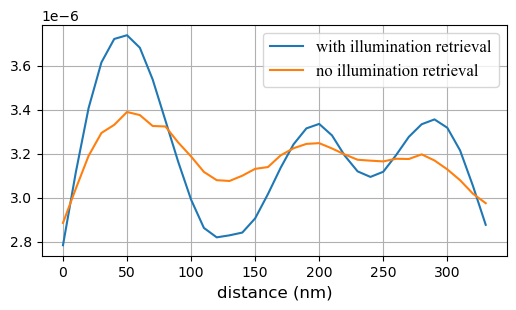

NameError: name 'done' is not defined

In [30]:
fig, ax = plt.subplots(1, figsize=(6, 3))
cc=0.33
z=860
y=633
st = 152
end=186
csfont = {'fontname':'Times New Roman'}
# plt.rcParams["font.family"] = "Times New Roman"
plt.plot(np.arange(0,end-st)*voxelsize*1e9,-c*cc*(recadmm_rot[z,y,np.arange(st,end)])+2.3e-6,label='with illumination retrieval')
plt.plot(np.arange(0,end-st)*voxelsize*1e9,-c*cc*(rec4[z,y,np.arange(st,end)+2])+2.3e-6,label='no illumination retrieval')
plt.grid()
plt.xlabel('distance (nm)',fontsize=12,**csfont))
plt.legend(fontsize=12)

plt.savefig(f'figs/plot_admm.png',dpi=300,bbox_inches='tight')
plt.show()


done

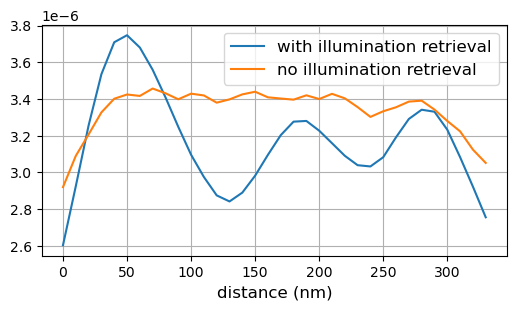

In [23]:
fig, ax = plt.subplots(1, figsize=(6, 3))
cc=0.4
plt.plot(np.arange(0,end-st)*voxelsize*1e9,-c*cc*(recadmm_rot[z,y,np.arange(st,end)])+2e-6,label='with illumination retrieval')
plt.plot(np.arange(0,end-st)*voxelsize*1e9,-c*cc*(rec4[z,y,np.arange(st,end)+2])+2e-6,label='no illumination retrieval')
plt.grid()
plt.xlabel('distance (nm)',fontsize=12)
plt.legend(fontsize=12)

plt.savefig(f'figs/plot_admm.png',dpi=300,bbox_inches='tight')
plt.show()

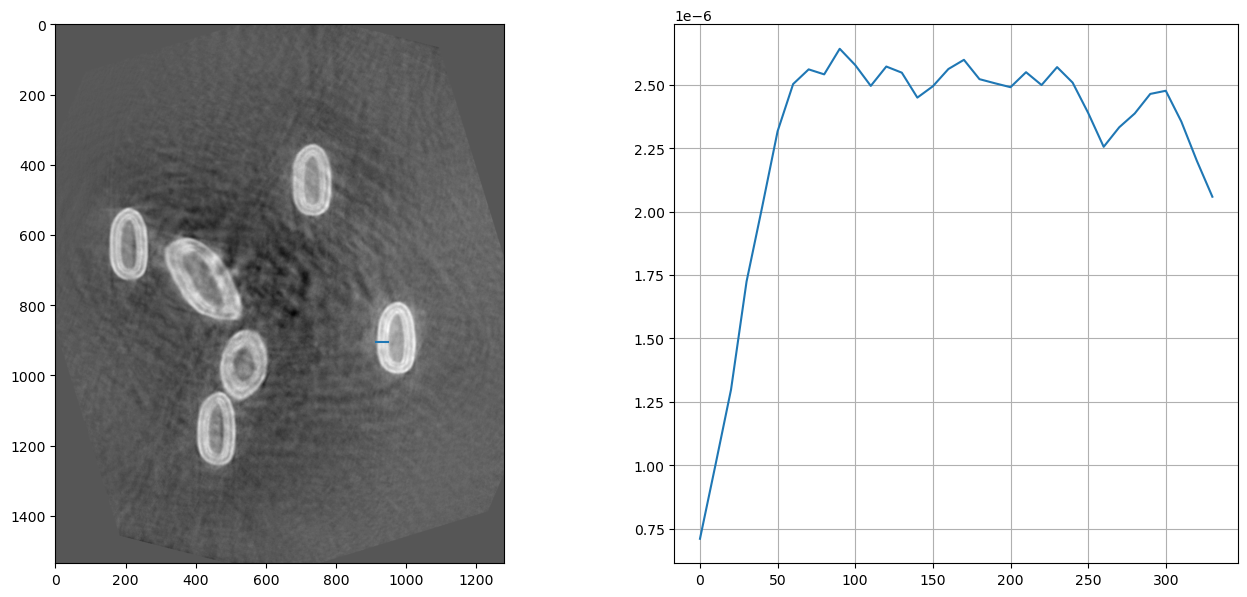

In [13]:
# dxchange.write_tiff_stack(-rec4,f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{ntheta}_{ndist}/cgfinal/rot_{400:04}.tiff',overwrite=True)
recnoprobe_rot = rec4.copy()
st = 914
end  =948
y = 905
z = 745
c = 0.001157390898890103

fig, ax = plt.subplots(1,2, figsize=(16, 7))
ax[0].imshow(-recnoprobe_rot[z,:]*c,cmap='gray')
# ax[0].add_artist(ScaleBar(voxelsize,location='lower right'))
ax[0].plot(np.arange(st,end),np.arange(st,end)*0+y)
# plt.colorbar()
# plt.show()
ax[1].plot(np.arange(0,end-st)*voxelsize*1e9,-c*(recnoprobe_rot[z,y,np.arange(st,end)])-1e-6)
ax[1].grid()
plt.show()

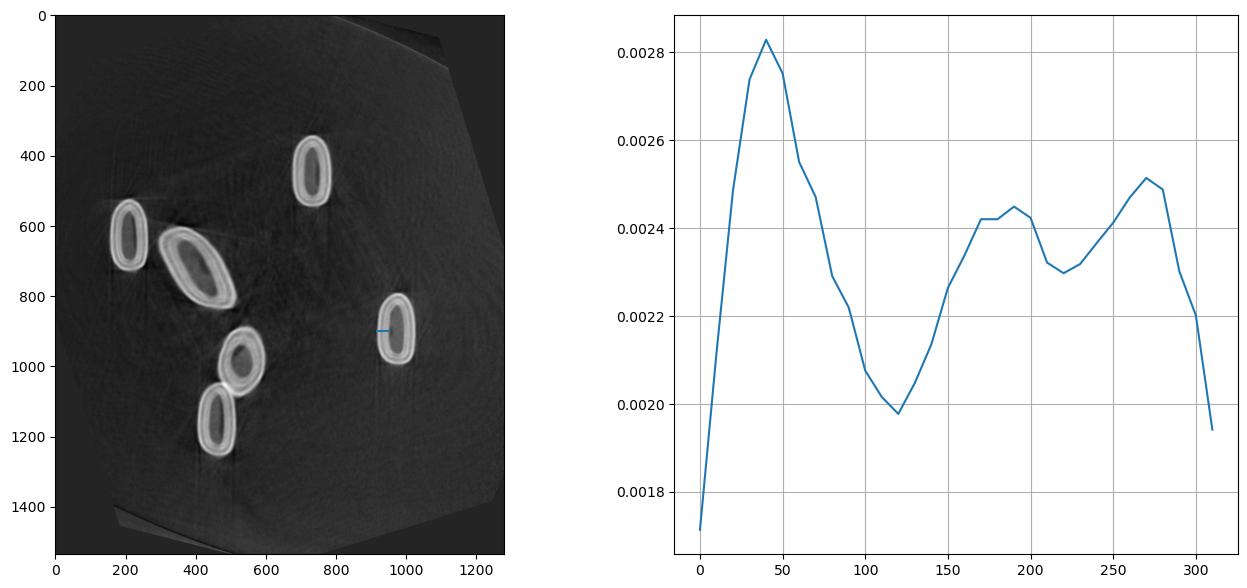

In [ ]:
# dxchange.write_tiff_stack(-rec4,f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{ntheta}_{ndist}/cgfinal/rot_{400:04}.tiff',overwrite=True)
st = 917
end  =949
y = 900
z = 732


fig, ax = plt.subplots(1,2, figsize=(16, 7))
ax[0].imshow(-rec5[z,:],cmap='gray')
# ax[0].add_artist(ScaleBar(voxelsize,location='lower right'))
ax[0].plot(np.arange(st,end),np.arange(st,end)*0+y)
# plt.colorbar()
# plt.show()
ax[1].plot(np.arange(0,end-st)*voxelsize*1e9,-rec5[z,y,np.arange(st,end)])
ax[1].grid()
plt.show()

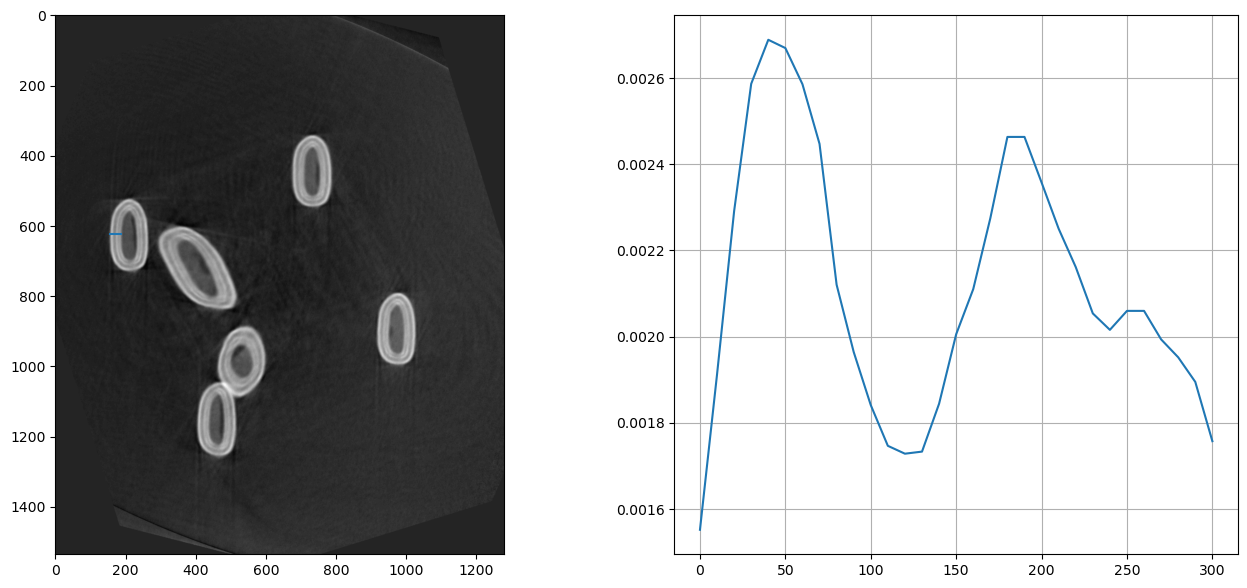

: 

In [ ]:
dxchange.write_tiff_stack(-rec5,f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{ntheta}_{ndist}/cgfinal/rotm_{400:04}.tiff',overwrite=True)
st = 157
end  =188
y = 622
z = 732


fig, ax = plt.subplots(1,2, figsize=(16, 7))
ax[0].imshow(-rec5[z,:],cmap='gray')
# ax[0].add_artist(ScaleBar(voxelsize,location='lower right'))
ax[0].plot(np.arange(st,end),np.arange(st,end)*0+y)
# plt.colorbar()
# plt.show()
ax[1].plot(np.arange(0,end-st)*voxelsize*1e9,-rec5[z,y,np.arange(st,end)])
ax[1].grid()
plt.show()

In [ ]:
def apply_shift(psi, p):
    """Apply shift for all projections."""
    psi = cp.array(psi)
    p = cp.array(p)
    [nz,n] = psi.shape[1:]
    tmp = cp.pad(psi,((0,0),(nz//2,nz//2),(n//2,n//2)), 'symmetric')
    [x, y] = cp.meshgrid(cp.fft.rfftfreq(2*n),
                         cp.fft.fftfreq(2*nz))
    shift = cp.exp(-2*cp.pi*1j *
                   (x*p[:, 1, None, None]+y*p[:, 0, None, None]))
    res0 = cp.fft.irfft2(shift*cp.fft.rfft2(tmp))
    res = res0[:, nz//2:3*nz//2, n//2:3*n//2].get()
    return res

shifts = np.zeros([1500,2])
shifts[:,0] = -np.linspace(0,5,1500)
shifts[:,1] = 0 

nz=1280
ngpus=2
iter = 192
center = 791
data = np.zeros([1500,nz,n],dtype='float32')
shiftc = int(center-n//2)

theta = np.loadtxt(f'/data/viktor/id16a/3d_ald4/3d_ald4_ht_10nm_/angles_file.txt').astype('float32')[:]/180*np.pi

for st in range(0,1500//250):
    data[st:1500:1500//250] = dxchange.read_tiff(f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{250}_{ndist}_{st}/r{iter:05}.tiff')[:,800:800+nz,ne//2-n//2+shiftc:ne//2+n//2+shiftc]
    
data_new = data.copy()
for k in range(ntheta):
    data_new[k:k+1] = apply_shift(data[k:k+1],-shifts[k:k+1])
dxchange.write_tiff_stack(data_new,f'/data/vnikitin/holo/3d_ald/data_new/3.tiff',overwrite=True)

init = np.zeros([nz,n,n],dtype='float32')
with tomoalign.SolverTomo(theta, ntheta, nz, n, 32, center, ngpus) as tslv:
    u = tslv.cg_tomo_batch(data_new, init, 400)
    dxchange.write_tiff(u, f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{ntheta}_{ndist}/cgfinal/r_{400:04}',overwrite=True)


# noprobe
iter = 160
for st in range(0,1500//250):
    data[st:1500:1500//250] = dxchange.read_tiff(f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{250}_{ndist}_{st}/r{iter:05}noprobe.tiff')[:,800:800+nz,ne//2-n//2+shiftc:ne//2+n//2+shiftc]
    
data_new = data.copy()
for k in range(ntheta):
    data_new[k:k+1] = apply_shift(data[k:k+1],-shifts[k:k+1])
dxchange.write_tiff_stack(data_new,f'/data/vnikitin/holo/3d_ald/data_new/3noprobe.tiff',overwrite=True)

init = np.zeros([nz,n,n],dtype='float32')
with tomoalign.SolverTomo(theta, ntheta, nz, n, 32, center, ngpus) as tslv:
    u = tslv.cg_tomo_batch(data_new, init, 400)
    dxchange.write_tiff(u, f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{ntheta}_{ndist}/cgfinalnoprobe/r_{400:04}',overwrite=True)



In [ ]:
ntheta = 1500
n = 1536
ne = 2528
nz = 2
iter = 64
ndist = 4
ngpus = 1
pnz = 1
same_prb = True
# data = dxchange.read_tiff(f'/data/vnikitin/holo/psirec_3d_ald_angle{n}_{ntheta}_{ndist}.tiff')[:,n:n+2,n//2:-n//2]
cut = 0#128+32+8#(428-768//2)*4
n0 = n-cut
data = np.zeros([1500,nz,n0],dtype='float32')
for st in range(0,1500//250):
    data[st:1500:1500//250] = dxchange.read_tiff(f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{250}_{ndist}_{st}/r{iter:05}.tiff')[:,ne//2+478*2-n//2:ne//2+478*2-n//2+2,ne//2-n//2:ne//2+n//2]

# # print(data.shape)
theta = np.loadtxt(f'/data/viktor/id16a/3d_ald4/3d_ald4_ht_10nm_/angles_file.txt').astype('float32')[:]/180*np.pi
# # print(theta)

for center in np.arange(396*2-2,396*2+2,0.5):
    print(f'check center {center}')
    init = np.zeros([nz,n0,n0],dtype='float32')
    with tomoalign.SolverTomo(theta, ntheta, nz, n0, pnz, center, ngpus) as tslv:
        u = tslv.cg_tomo_batch(data, init, 256)
        dxchange.write_tiff(u[0], f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{ntheta}_{ndist}/try_center/r_{center:03.1f}',overwrite=True)


# center = 789

check center 790.0
check center 790.5
check center 791.0
check center 791.5
check center 792.0
check center 792.5
check center 793.0
check center 793.5


In [ ]:
center = 791
ntheta = 1500
n = 1536
ne = 2528
nz = 2
iter = 192
ndist = 4
ngpus = 1
pnz = 1
same_prb = True
# data = dxchange.read_tiff(f'/data/vnikitin/holo/psirec_3d_ald_angle{n}_{ntheta}_{ndist}.tiff')[:,n:n+2,n//2:-n//2]
cut = 0#128+32+8#(428-768//2)*4
n0 = n-cut
data = np.zeros([1500,nz,n0],dtype='float32')
shiftc = int(center-n//2)
for st in range(0,1500//250):
    data[st:1500:1500//250] = dxchange.read_tiff(f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{250}_{ndist}_{st}/r{iter:05}.tiff')[:,ne//2+478*2-n//2:ne//2+478*2-n//2+2,ne//2-n//2+shiftc:ne//2+n//2+shiftc]

# # print(data.shape)
theta = np.loadtxt(f'/data/viktor/id16a/3d_ald4/3d_ald4_ht_10nm_/angles_file.txt').astype('float32')[:]/180*np.pi
# # print(theta)

for center in np.arange(n/2-2,n/2+2,1):
    print(f'check center {center}')
    init = np.zeros([nz,n0,n0],dtype='float32')
    with tomoalign.SolverTomo(theta, ntheta, nz, n0, pnz, center, ngpus) as tslv:
        u = tslv.cg_tomo_batch(data, init, 400)
        dxchange.write_tiff(u[0], f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{ntheta}_{ndist}/try_center2/r_{center:03.1f}',overwrite=True)


check center 766.0
check center 767.0
check center 768.0
check center 769.0


# ADMM didnt help

In [ ]:
# niteradmm = [65, 33, 17]  # number of iterations in the ADMM scheme
# startwin = [n0//2, n0, 2*n0] # starting window size in optical flow estimation
# stepwin = [0, 0, 0] # step for decreasing the window size in optical flow estimtion

# res = tomoalign.admm_of_levels(
#     data, theta, pnz, ptheta, center, ngpus, niteradmm, startwin, stepwin, f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{ntheta}_{ndist}/iters2_lowdens/', padding=False)

# dxchange.write_tiff_stack(
#     res['u'], f'/data/vnikitin/holo/rfinal_probe_{same_prb}_{n}_{ntheta}_{ndist}/results_admm2_lowdens/u/r', overwrite=True)
# dxchange.write_tiff_stack(
#     res['psi'], f'/data/vnikitin/holo/rfinal_probe_{same_prb}_{n}_{ntheta}_{ndist}/results_admm2_lowdens/psi/r', overwrite=True)
# np.save(f'/data/vnikitin/holo/rfinal_probe_{same_prb}_{n}_{ntheta}_{ndist}/results_admm2_lowdens/flow',res['flow'])
# res['flow'].shape
# shifts = np.mean(res['flow'],axis=(1,2))

(1500, 320, 384)
iter 0, flow norm 0.00 wsize 768, rho 0.50, Lagrangian 1.3039e+06 5.3878e+05 2.6939e+05 Total 2.1120e+06 Time: 6.37 3.27 2.62 
iter 8, flow norm 1274.18 wsize 768, rho 1.00, Lagrangian 2.3329e+05 -2.8042e+03 5.5031e+02 Total 2.3103e+05 Time: 6.76 3.36 3.15 
iter 16, flow norm 1311.58 wsize 768, rho 1.00, Lagrangian 2.0749e+05 -1.5900e+03 6.2786e+01 Total 2.0596e+05 Time: 6.73 2.88 2.76 
iter 24, flow norm 1350.23 wsize 768, rho 1.00, Lagrangian 1.9857e+05 -6.1993e+02 1.9573e+01 Total 1.9797e+05 Time: 7.51 3.23 3.20 
iter 32, flow norm 1408.72 wsize 768, rho 1.00, Lagrangian 1.9491e+05 -2.8794e+02 6.5952e+00 Total 1.9462e+05 Time: 6.68 3.24 2.75 
iter 40, flow norm 1447.42 wsize 768, rho 1.00, Lagrangian 1.9311e+05 -1.5457e+02 3.3057e+00 Total 1.9296e+05 Time: 6.68 3.38 2.66 
iter 48, flow norm 1485.15 wsize 768, rho 1.00, Lagrangian 1.9210e+05 -9.3692e+01 1.3892e+00 Total 1.9201e+05 Time: 6.65 3.19 2.58 
iter 56, flow norm 1512.58 wsize 768, rho 1.00, Lagrangian 1.9147

# set manually

In [ ]:
from matplotlib_scalebar.scalebar import ScaleBar
voxelsize=1e-8
offset = 8
rec = dxchange.read_tiff(f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{ntheta}_{ndist}/cgfinal/r_{400:04}.tiff')
fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(-rec[:,n//2-offset,:],cmap='gray')
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
plt.colorbar()
plt.savefig(f'figs/recv.png',dpi=300,bbox_inches='tight')

fig, ax = plt.subplots(1, figsize=(3, 3))
plt.imshow(-rec[n//2,:],cmap='gray')
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
plt.colorbar()
plt.savefig(f'figs/rech.png',dpi=300,bbox_inches='tight')

In [ ]:
center = 791
ntheta = 1500
n = 1536
ne = 2528
nz = 2
iter = 192
ndist = 4
ngpus = 1
pnz = 1
same_prb = True
# data = dxchange.read_tiff(f'/data/vnikitin/holo/psirec_3d_ald_angle{n}_{ntheta}_{ndist}.tiff')[:,n:n+2,n//2:-n//2]
cut = 0#128+32+8#(428-768//2)*4
n0 = n-cut
data = np.zeros([1500,nz,n0],dtype='float32')
shiftc = int(center-n//2)
data=data_new[:,378*2:378*2+2]

# # print(data.shape)
theta = np.loadtxt(f'/data/viktor/id16a/3d_ald4/3d_ald4_ht_10nm_/angles_file.txt').astype('float32')[:]/180*np.pi
# # print(theta)

for center in np.arange(n/2-2,n/2+2,1):
    print(f'check center {center}')
    init = np.zeros([nz,n0,n0],dtype='float32')
    with tomoalign.SolverTomo(theta, ntheta, nz, n0, pnz, center, ngpus) as tslv:
        u = tslv.cg_tomo_batch(data, init, 400)
        dxchange.write_tiff(u[0], f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{ntheta}_{ndist}/try_center3/r_{center:03.1f}',overwrite=True)


check center 766.0
check center 767.0
check center 768.0
check center 769.0


In [ ]:

nz=1280
init = np.zeros([nz,n0,n0],dtype='float32')
with tomoalign.SolverTomo(theta, ntheta, nz, n0, 32, center, ngpus) as tslv:
    u = tslv.cg_tomo_batch(data_new, init, 400)
    dxchange.write_tiff(u, f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{ntheta}_{ndist}/cgfinal/r_{400:04}',overwrite=True)

In [ ]:

# niteradmm = [132, 66, 44]  # number of iterations in the ADMM scheme
# # niteradmm = [2,2,2]  # number of iterations in the ADMM scheme
# startwin = [352, 176, 88] # starting window size in optical flow estimation
# stepwin = [2, 2, 2] # step for decreasing the window size in optical flow estimtion

# [nz,n0] = data.shape[1:]#dxchange.write_tiff(u, f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{ntheta}_{ndist}/cgfull/r_{iter:04}',overwrite=True)
# res = tomoalign.admm_of_levels(
#     data, theta, pnz, ptheta, center, ngpus, niteradmm, startwin, stepwin, f'/data/vnikitin/holo/3d_ald/rfinal_probe_{same_prb}_{n}_{ntheta}_{ndist}/iters2/', padding=False)

# dxchange.write_tiff_stack(
#     res['u'], f'/data/vnikitin/holo/rfinal_probe_{same_prb}_{n}_{ntheta}_{ndist}/results_admm2/u/r', overwrite=True)
# dxchange.write_tiff_stack(
#     res['psi'], f'/data/vnikitin/holo/rfinal_probe_{same_prb}_{n}_{ntheta}_{ndist}/results_admm2/psi/r', overwrite=True)
# raise Exception